In [645]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Part 1 - Cleaning the Data

In [701]:
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [702]:
traintweets = train_data["Tweet"]

testtweets = test_data["Tweet"]

def Processing(string):
    def readtext(fN):
        file = open(fN, "r") 
        doc = file.read().splitlines()
        file.close()
        return doc
    
    stop_words = readtext('stop_words.txt') 
    
    string1 = re.sub(r'[0-9]+', '', string)
    punctuations = '''!()-[]{};:'"\,<>./?#$%^&*_~''' 
    newstring = ""
    for charector in string1: 
        if charector not in punctuations:
            newstring = newstring + charector 
    string2 = re.sub(r'http\S+', '', newstring) 
    string3 = re.sub('@[\w]+','',string2) 
    string4 = string3.lower()
    string5  = [word for word in re.split("\W+",string4) if word.lower() not in stop_words] 
    string6 = (" ").join(string5) 
    return string6

In [703]:
train_t = traintweets.copy()
for i in range(len(train_t)):
    train_t[i] = Processing(train_t[i])
train_data.insert(2, "Procesed", train_t) 

test_t = testtweets.copy()
for i in range(len(test_t)):
    test_t[i] = Processing(test_t[i])
test_data.insert(2, "Procesed", test_t) 
train_data.head(5)

,Sentiment,Tweet,Procesed
0,neutral,"@united to be clear on my luggage comment, I a...",clear luggage comment referencing photo attac...
1,positive,@united I wanna be grand staff,wanna grand staff
2,negative,@united. DAY to IAD and CVG to IAD both Cancel...,day iad cvg iad cancelled flightled united ai...
3,positive,@JetBlue Looking cool,looking cool
4,negative,@USAirways disappointment? Making own arrangem...,disappointment making arrangements amp sleepi...


# Part 2 - Creating Bag of Words

In [704]:
BoW = []
for sentence in train_t:
    counts = dict()
    words = sentence.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    BoW.append(counts)
    
df = pd.DataFrame(BoW)
df =df.fillna(0)
df

,clear,luggage,comment,referencing,photo,attached,flight,jac,wanna,grand,...,bgm,wk,callcentre,runways,lgasat,usdo,preferably,oneasy,reservationhelpful,reboot
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [706]:
# Creating Bag of words for test data with the same vocabulary as train data 
combine = pd.concat([train_t, test_t])
Bow_test = []
for sentence in combine:
    counts = dict()
    words = sentence.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    Bow_test.append(counts)
df2 = pd.DataFrame(Bow_test)
df2 = df2.fillna(0)
df2 = df2.reindex(columns=df.columns)
df2 = df2[5856:]

In [707]:
df2.shape

(1464, 7551)

# Part 3 - Implementation in logistic 

In [654]:
x_train = df.values
train1 = train_data.copy().replace(['positive', 'negative', 'neutral'], 
                     [1, 0, 0]) 
train2 = train_data.copy().replace(['positive', 'negative', 'neutral'], 
                     [0, 1, 0]) 
train3 = train_data.copy().replace(['positive', 'negative', 'neutral'], 
                     [0, 0, 1]) 
y_train1 = train1['Sentiment']
y_train2 = train2['Sentiment']
y_train3 = train3['Sentiment']

y_train1  = np.array(y_train1).reshape(-1,1)
y_train2  = np.array(y_train2).reshape(-1,1)
y_train3  = np.array(y_train3).reshape(-1,1)

In [450]:
def sigmoid(z): 
    h = 1 / (1+np.exp(-z))
    return h

In [536]:
def Weights_and_cost(X,y,L,epoch,c):
    w=np.zeros((len(X[1]),1))
    N = len(X[0])
    cost = []
    for i in range(epoch):
        z=np.dot(X,w)
        y_pred = sigmoid(z)
        cost.append(-np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred)))
        dw=1/N*np.dot(X.T,(y_pred-y)) 
        dwr = dw + (c / N) * np.r_[[[0]], w[1:]] # https://stackoverflow.com/questions/52286971/regularized-logistic-regression-in-python-andrew-ng-course
        w = w - Learning_Rate*dwr
    return w,cost

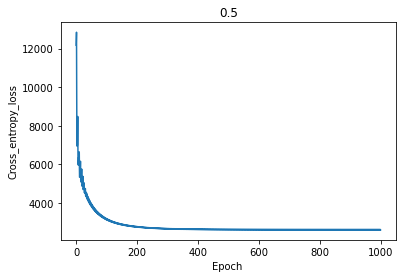

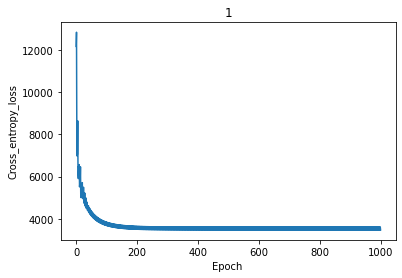

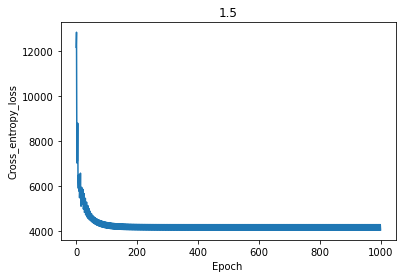

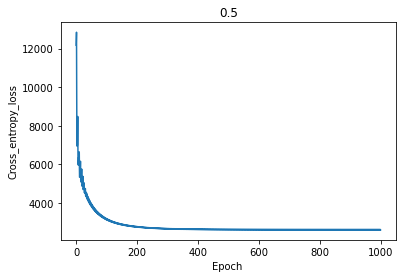

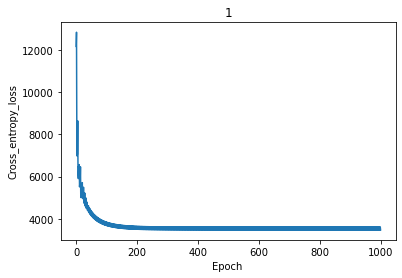

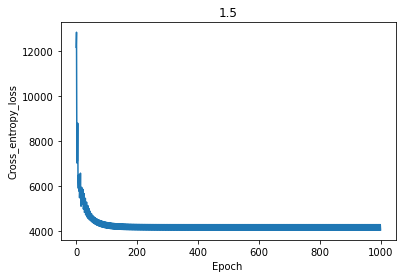

In [903]:
alpha = [0.0001, 0.001]
reg = [0.5,1,1.5]
for a in alpha:
    for c in reg:
        w1,cost1 = Weights_and_cost(x_train,y_train1,a,1000,c)
        w2,cost2 = Weights_and_cost(x_train,y_train2,a,1000,c)
        w3,cost3 = Weights_and_cost(x_train,y_train3,a,1000,c)
        Cel = np.array([cost1,cost2,cost3])
        Cross_entropy_loss = Cel.sum(axis=0)
        plt.plot(Cross_entropy_loss)
        plt.xlabel("Epoch ")
        plt.ylabel( "Cross_entropy_loss")
        plt.title(c)
        plt.show()


In [710]:
x_test = df2.values
train = train_data.copy().replace(['positive', 'negative', 'neutral'], [0, 1, 2]) 
y_train = train['Sentiment']
y_train  = np.array(y_train).reshape(-1,1)
test = test_data.copy().replace(['positive', 'negative', 'neutral'], [0, 1, 2]) 
y_test  = np.array(y_test).reshape(-1,1)

In [711]:
#as we can see loss is minimized when we use 0.5 as regularization otherwise loss does not converge to below 1000 for 1000 epochs
#as 0.001 gives a reasonably well/nearly the same accuracy faster we will be using it
L = 0.001
epoch= 1000
c = 0.5
w1,cost1 = Weights_and_cost(x_train,y_train1,L,epoch,c)
w2,cost2 = Weights_and_cost(x_train,y_train2,L,epoch,c)
w3,cost3 = Weights_and_cost(x_train,y_train3,L,epoch,c)

In [712]:
y_p_1 = sigmoid(np.dot(x_test,w1))
y_p_2 = sigmoid(np.dot(x_test,w2))
y_p_3 = sigmoid(np.dot(x_test,w3))

p = np.hstack((y_p_1,y_p_2,y_p_3))
y_pred = np.argmax(p, axis=1)

# Evalutation metrics

In [716]:
def compute_Accuracy(true, pred):
    true_val = 0
    for i in range(len(true)):
        if true[i] == pred[i]:
            true_val += 1
    return true_val / float(len(true))

In [789]:
compute_Accuracy(y_test, y_pred)

0.7636612021857924

In [825]:
def f1_m(actual,pred,clas):
    f1_score = np.zeros(clas)
    for i in range(clas):
        tp = tn = fp =  fn = 0
        for j in range(len(pred)):
            if pred[j] == i and i == actual[j]:
                tp += 1
            elif pred[j] != i and i != actual[j]:
                tn += 1
            elif pred[i] == i and i != actual[j]:
                fp += 1
            elif pred[i] != i and i == actual[j]:
                fn += 1

        f1_score[i] = 2*tp / (2*tp + fp + fn)

    return sum(f1_score)/3

In [826]:
f1_m(y_test, y_pred, 3)

0.7579446623800582

In [833]:
y_test = y_test.reshape(-1)
conf_matrix = pd.crosstab(pd.Series(y_pred, name = 'Predicted'), pd.Series(y_test, name = 'Actual'))
conf_matrix

Actual,0,1,2
Predicted,,,
0,156,33,38
1,54,837,138
2,29,54,125


# Part 4 - Scikit Learn 

In [834]:
x_train = df.values
x_test = df2.values
train = train_data.copy().replace(['positive', 'negative', 'neutral'], [0, 1, 2]) 
y_train = train['Sentiment']
test = test_data.copy().replace(['positive', 'negative', 'neutral'], [0, 1, 2]) 
 
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [835]:
f1_score(y_test,y_pred , average='macro')

0.6897767857243969

In [836]:
accuracy_score(y_test,y_pred , normalize=True)

0.76775956284153

In [837]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[146,  47,  46],
       [ 25, 823,  76],
       [ 23, 123, 155]])

# Part 5 - Naive Bayes

In [838]:
tweets = train_data['Procesed']
tweets_test = test_data['Procesed']
pos = []
neg = []
npos = 0
nneg = 0
nneu = 0
for i in range(len(sentiment)):
    if sentiment[i] == 'positive':
        pos.append(tweets[i])
        npos += 1
    elif sentiment[i] == 'negative':
        neg.append(tweets[i])
        nneg += 1
    else:
        neu.append(tweets[i])
        nneu += 1


In [839]:
words = [word for line in tweets for word in line.split()] 
vocab = list(set(words))
wpos = [word for line in pos for word in line.split()]
wneg = [word for line in neg for word in line.split()]
wneu = [word for line in neu for word in line.split()] 

In [841]:
train = train_data.replace(['positive', 'negative', 'neutral'], [0, 1, 2]) 

In [842]:
def train(classes,word, counts):
    log_prior = []
    log_likelihood = []
    for i,c in enumerate(classes):
        prob = counts[i] / np.sum(counts)
        log_prior.append(np.log(prob))
        b = len(c)+len(vocab)
        a = c.count(word) + 1
        log_likelihood.append(np.log(a/b))
    return log_prior,log_likelihood
classes = [wpos,wneg, wneu]
counts = [npos, nneg, nneu]

In [843]:
def test_bayes(test_sent,classes,counts): 
    sums = []
    test = test_sent.split()
    for i in range(3):
        sm = []
        for word in test:
            if word in vocab:
                sm.append(train(classes,word,counts)[0][i] + train(classes,word,counts)[1][i])
        sums.append(sum(sm))    
    return sums

In [844]:
sent = []
for sentence in tweets_test:
    classes = [wpos, wneg, wneu]
    counts = [npos, nneg, nneu]
    arr = test_bayes(sentence,classes,counts)
    sent.append(arr.index(max(arr)))

In [898]:
test = test.replace(['positive', 'negative', 'neutral'], [0, 1, 2]) 
y_test = test['Sentiment']

# Evaluation

In [846]:
f1_m(y_test, sent, 3) #F1 score is on the lower side but TA Alishba has gone through the code of part -5 Naive - bayes line by 
#line by line and has approved and said there are no major bugs

0.40810585948200623

In [848]:
compute_Accuracy(y_test, sent)

0.6680327868852459

In [849]:
conf_matrix = pd.crosstab(pd.Series(sent, name = 'Predicted'), pd.Series(y_test, name = 'Actual'))
conf_matrix

Actual,0,1,2
Predicted,,,
0,34,5,9
1,196,915,263
2,9,4,29


# Part 6 - Scikit

In [855]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb = nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [856]:
accuracy_score(y_test,nb_predict)

0.7629781420765027

In [857]:
f1_score(y_test,nb_predict,average = 'macro')

0.6477570904321102

In [897]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,nb_predict)
cm

array([[132,  83,  24],
       [  8, 887,  29],
       [ 25, 178,  98]])

In [ ]:
# Accuracy of Logistic: 0.76775956284153
# Accuracy of Naive: 0.7629781420765027
# Macro f1 of Logistic: 0.6897767857243969
# Macro f1 of Naive: 0.6477570904321102


# It can be observed that the Macro f1 Score of Logistic is better than Naive Bayes.
#Naive Bayes  assumes that the features are conditionally independent and Real data sets are never perfectly independent but they can be close. 
# and Naive Bayes has a higher bias but lower variance compared to logistic regression as we can see here
#that features do have an element of correlation therefore logistic has fared better
